## 第62课 应用LSTM识别Fake News(NLP)


### Python零基础学习建模：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

### Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode

Dataset: https://www.kaggle.com/c/fake-news/data#

In [443]:
import pandas as pd

In [445]:
df=pd.read_csv('D:/python/Project28-fakenews/Fake-New-LSTM-master/Lesson62-train.csv')

In [447]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [448]:
###Drop Nan Values
df.dropna(inplace = True)
#df=df.dropna()

In [391]:
#df.fillna(' ', inplace=True)

In [450]:
df.shape

(18285, 5)

In [451]:
## Get the Independent Features
X = df.drop('label', axis = 1)

In [452]:
## Get the Dependent features
y=df['label']

In [453]:
X.shape

(18285, 4)

In [454]:
y.shape

(18285,)

In [455]:
X

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [456]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64

In [457]:
import tensorflow as tf

In [458]:
tf.__version__

'2.3.0'

In [459]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow import keras

In [460]:
### Vocabulary size
voc_size=5000

### Onehot Representation

In [461]:
messages = X.copy()
messages.reset_index(inplace = True)

In [463]:
messages['title']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                        Why the Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
18280    Rapper T.I.: Trump a ’Poster Child For White S...
18281    N.F.L. Playoffs: Schedule, Matchups and Odds -...
18282    Macy’s Is Said to Receive Takeover Approach by...
18283    NATO, Russia To Hold Parallel Exercises In Bal...
18284                            What Keeps the F-35 Alive
Name: title, Length: 18285, dtype: object

In [464]:
messages

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [465]:
import nltk
import re
from nltk.corpus import stopwords

In [466]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raymond\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [468]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

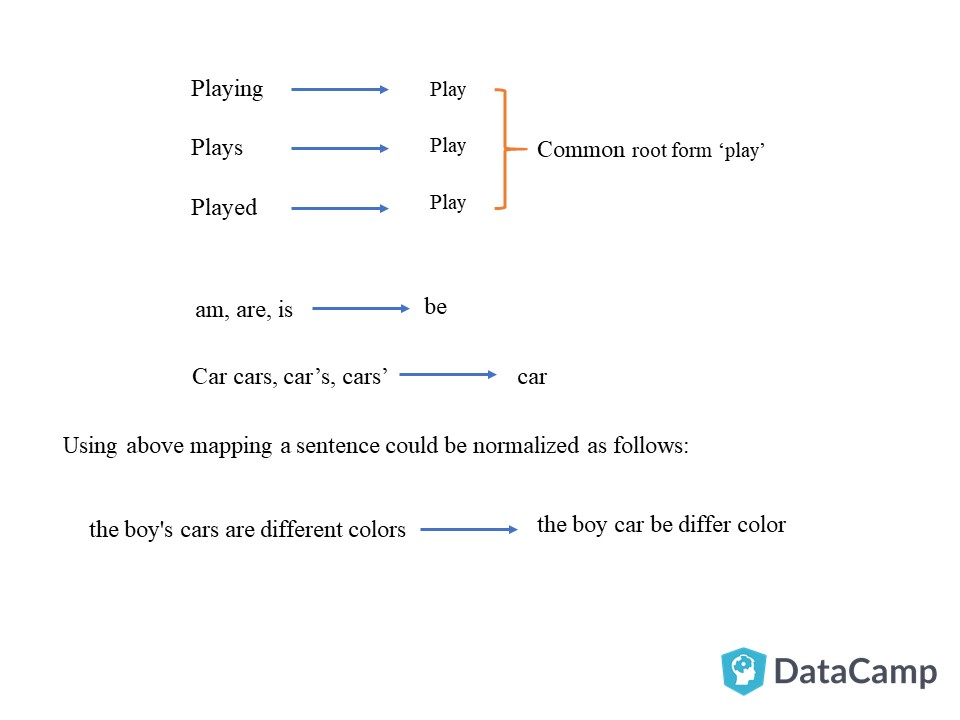

In [425]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson62-stemminglemmatization.JPG')

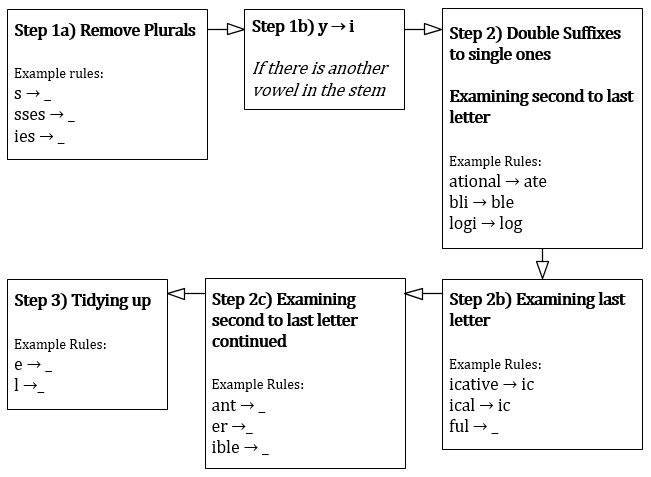

In [424]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson62-porter-stemming-overview.png')

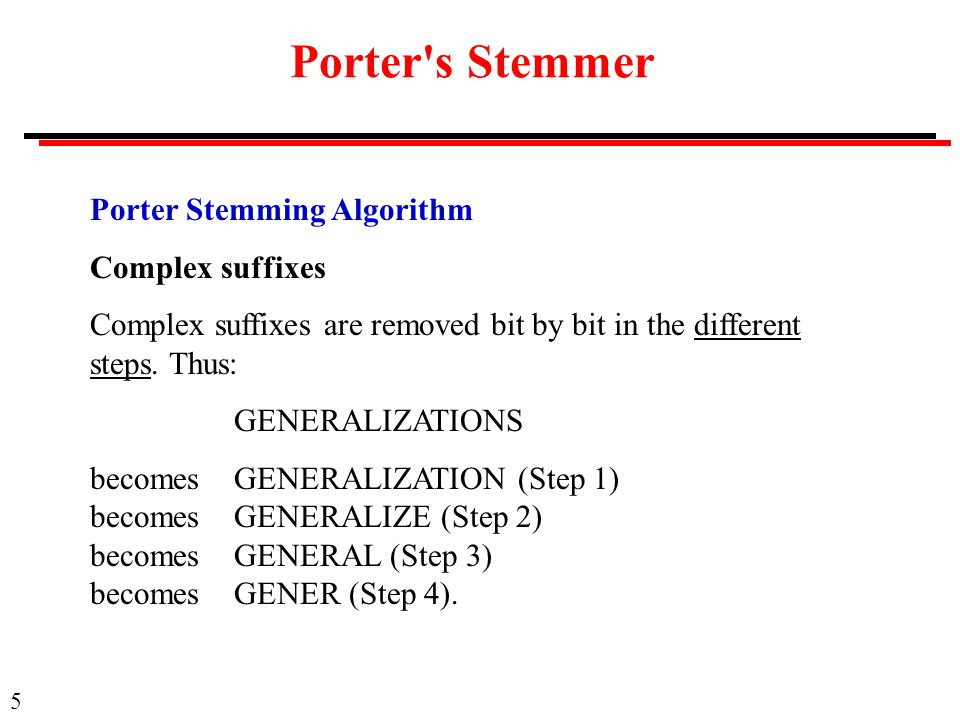

In [426]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson62-Porter+s+Stemmer+Porter+Stemming+Algorithm+Complex+suffixes.jpg')

In [467]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [469]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [470]:
onehot_repr=[one_hot(words,voc_size) for words in corpus] 
onehot_repr

[[2345, 445, 880, 3406, 1291, 3493, 4877, 2644, 4136, 3594],
 [3218, 1926, 1518, 2164, 4716, 2130, 4317],
 [3909, 2170, 2451, 4880],
 [1656, 1483, 3478, 1413, 2408, 1772],
 [982, 4716, 159, 2298, 513, 52, 4716, 705, 2506, 3322],
 [4900,
  1685,
  2308,
  857,
  3991,
  2889,
  882,
  1218,
  1413,
  1299,
  1638,
  3279,
  2509,
  4350,
  4317],
 [3206, 2767, 1785, 3292, 3399, 1963, 2093, 2165, 3500, 2186, 167],
 [3359, 2655, 951, 4435, 4590, 1346, 2889, 1216, 3500, 2186, 167],
 [1793, 1039, 3994, 2471, 1508, 2113, 3474, 1709, 2889, 4321],
 [4770, 2121, 378, 2656, 3709, 1732, 2119, 1548],
 [3029, 575, 2170, 589, 3282, 686, 2026, 1736, 360, 1590, 2121],
 [1413, 58, 1291, 2113, 2889, 4590],
 [3564, 48, 473, 4176, 3837, 2719, 631, 4100, 4687],
 [2907, 4901, 2007, 2443, 2560, 3562, 1262, 3500, 2186, 167],
 [4403, 3067, 2300, 3129, 3188, 3500, 2186, 167],
 [259, 4631, 571, 3011, 4726, 470, 2661, 4060, 1825, 2323],
 [4696, 415, 1926],
 [2403, 1675, 1247, 147, 2889, 4875, 363, 4317],
 [3881, 

### Embedding Representation

In [471]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2644 4136 3594]
 [   0    0    0 ... 4716 2130 4317]
 [   0    0    0 ... 2170 2451 4880]
 ...
 [   0    0    0 ... 3500 2186  167]
 [   0    0    0 ... 1440 1944 4487]
 [   0    0    0 ...  150 4996 1487]]


In [472]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 2345,
        445,  880, 3406, 1291, 3493, 4877, 2644, 4136, 3594])

In [473]:
## Creating model
embedding_vector_features = 40
model = keras.Sequential([
      keras.layers.Embedding(5000, embedding_vector_features, input_length = 20),
      keras.layers.LSTM(100),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(1, activation = 'sigmoid')
   ])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [474]:
len(embedded_docs),y.shape

(18285, (18285,))

In [475]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 20, 40)            200000    
_________________________________________________________________
lstm_16 (LSTM)               (None, 100)               56400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [476]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [477]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [478]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.30, random_state=42)

### Model Training

In [479]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
200/200 [==============================] - 11s 54ms/step - loss: 0.3329 - accuracy: 0.8407 - val_loss: 0.1915 - val_accuracy: 0.9183
Epoch 2/10
200/200 [==============================] - 10s 52ms/step - loss: 0.1384 - accuracy: 0.9466 - val_loss: 0.2028 - val_accuracy: 0.9131
Epoch 3/10
200/200 [==============================] - 10s 52ms/step - loss: 0.0955 - accuracy: 0.9658 - val_loss: 0.2147 - val_accuracy: 0.9129
Epoch 4/10
200/200 [==============================] - 10s 50ms/step - loss: 0.0666 - accuracy: 0.9762 - val_loss: 0.2437 - val_accuracy: 0.9132
Epoch 5/10
200/200 [==============================] - 11s 53ms/step - loss: 0.0431 - accuracy: 0.9863 - val_loss: 0.3214 - val_accuracy: 0.9149
Epoch 6/10
200/200 [==============================] - 10s 52ms/step - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.3199 - val_accuracy: 0.9094
Epoch 7/10
200/200 [==============================] - 10s 51ms/step - loss: 0.0192 - accuracy: 0.9942 - val_loss: 0.3712 - val_accuracy:

### Performance Metrics And Accuracy

In [480]:
y_pred=model.predict_classes(X_test)

In [481]:
from sklearn.metrics import confusion_matrix

In [482]:
confusion_matrix(y_test,y_pred)

array([[2870,  237],
       [ 268, 2111]], dtype=int64)

In [483]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9079475027342326